In [7]:
import pandas as pd
import numpy as np

techniques = {"BERT": "BERT ptBR",
              "BERT_FINE": "BERT Jud",
              "GPT2": "GPT-2 ptBR",
              "GPT2_FINE": "GPT-2 Jud",
              "RoBERTa": "RoBERTa ptBR",
              "RoBERTa_FINE": "RoBERTa Jud"}

path = 'data/' 
boxplot_data = []
boxplot_data_group = []
for type in techniques:
    print(type)
    path = 'data/' + type + '/'
    df_result_group = pd.read_csv(path + 'consolidated_group.zip')

    #df_result = pd.read_pickle(path + 'consolidated_data.pkl', compression='zip')
    df_result = None
    for i in range(10):
        if i == 0:
            df_result = pd.read_pickle(path + 'consolidated_data' + str(i) + '.pkl', compression='zip')
        else:
            df_result = pd.concat([df_result, pd.read_pickle(path + 'consolidated_data' + str(i) + '.pkl', compression='zip')])
            
    df_agg = df_result[['group_id', 'dist_cntr']].groupby('group_id').agg(count=('dist_cntr', 'count'), mean=('dist_cntr', 'mean')) 
    
    if len(boxplot_data) == 0:        
        boxplot_data = [df_agg['mean'].copy()]
    else:
        boxplot_data.append(df_agg['mean'].copy())
    print(np.shape(boxplot_data))
        
    dfs = []
    for nivel in reversed(np.unique(df_result_group.base_level.values)):
        if(len(dfs) == 0):
            df = df_result_group[df_result_group.base_level==nivel]        
            dfs = [df.copy()]
        else:
            df = df_result_group[(df_result_group.base_level==nivel) & (~df_result_group.group_id.isin(df_result_group[df_result_group.base_level==nivel+1]['parent_group_id'].unique()))]
            dfs.insert(0, df.copy())

    df = pd.concat(dfs)
    df = df[['group_id', 'mean']].drop_duplicates()
    
    if len(boxplot_data_group) == 0:        
        boxplot_data_group = [df['mean'].copy()]
    else:
        boxplot_data_group.append(df['mean'].copy())
    print(np.shape(boxplot_data_group))
    

BERT
(1, 35)
(1, 35)
BERT_FINE


c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2,)
(2,)
GPT2


c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(3,)
(3,)
GPT2_FINE


c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(4,)
(4,)
RoBERTa


c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(5,)
(5,)
RoBERTa_FINE
(6,)
(6,)


c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\TRT05\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


['BERT\nptBR',
 'BERT\nJud',
 'GPT2\nptBR',
 'GPT2\nJud',
 'RoBERTa\nptBR',
 'RoBERTa\nJud']

In [11]:
import matplotlib.pyplot as plt

def plot_boxplot(data, name, techniques):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    #fig.canvas.set_window_title('A Boxplot Example')
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5,                      
                     labels=[value.replace(' ', '\n') for value in list(techniques.values())], showmeans=True,
                     meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'))
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    # Hide these grid behind plot objects
    ax1.set_axisbelow(True)
    ax1.set_title('Comparison of Distributions', fontsize=18)
    ax1.set_ylabel('Mean cosine similarity', fontsize=18)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)

    from matplotlib.lines import Line2D
    ax1.legend(handles=[Line2D([0], [0], marker='D', markeredgecolor='black', markerfacecolor='firebrick', label='Mean', markersize=10)], 
               loc='lower left', 
               #loc='lower right', 
               fontsize=20)

    plt.show()
    print(fig.dpi)
    
    fig.savefig(name + '.png', dpi=600)    

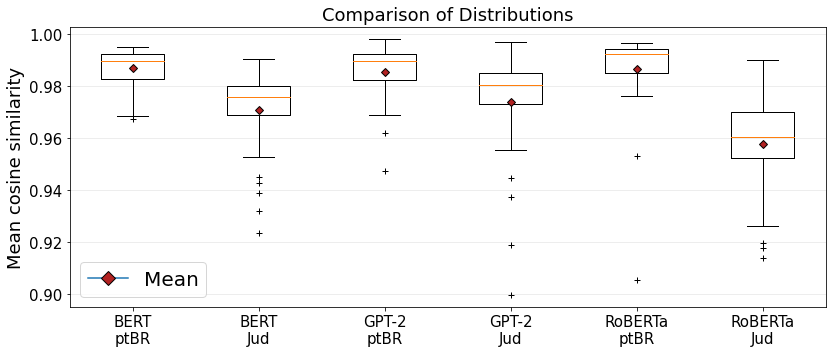

72.0


In [12]:
plot_boxplot(boxplot_data, 'boxplot', techniques)

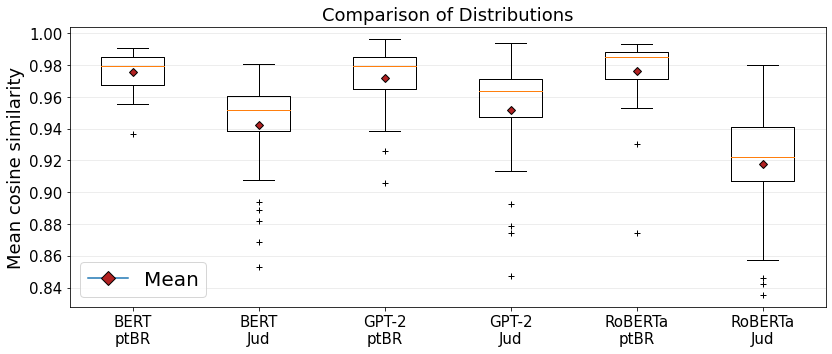

72.0


In [13]:
plot_boxplot(boxplot_data_group, 'boxplot_group', techniques)

In [36]:
boxplot_data[2].describe()

count    34.000000
mean      0.948189
std       0.060858
min       0.796032
25%       0.924822
50%       0.976267
75%       0.992450
max       0.999513
Name: mean, dtype: float64